In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('../data/processed/data.csv')
data.head()

,Country,Happiness Rank,Happiness Score,GDP/C,Family,Health,Freedom,Government Corruption,Generosity,Year
0,finland,1,7.769,1.340,1.587,0.986,0.596,0.393,0.153,2019
1,denmark,2,7.600,1.383,1.573,0.996,0.592,0.410,0.252,2019
2,norway,3,7.554,1.488,1.582,1.028,0.603,0.341,0.271,2019
3,iceland,4,7.494,1.380,1.624,1.026,0.591,0.118,0.354,2019
4,netherlands,5,7.488,1.396,1.522,0.999,0.557,0.298,0.322,2019


    Country  Happiness Rank_first  Happiness Rank_last  Rank_change
137   benin                   155                  102           53




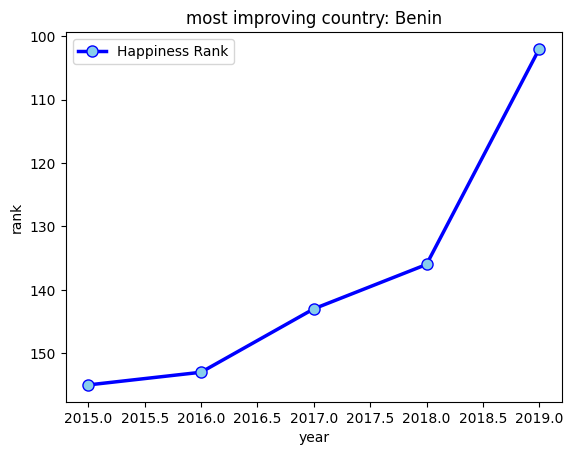

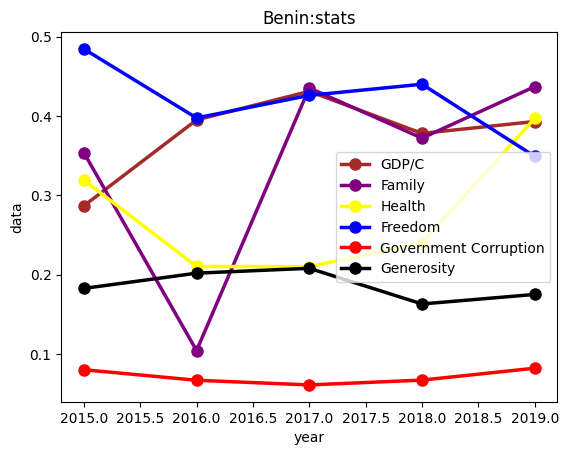

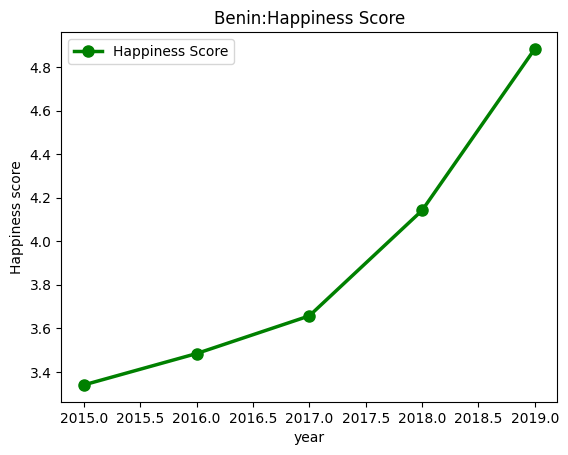



average rank change of all countries excluding benin :  2.3642857142857143




Text(0, 0.5, 'Stats')

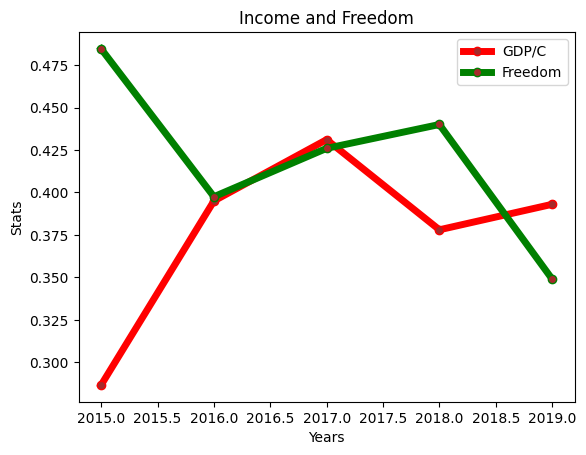

In [12]:
# 1 Which country’s happiness rank has improved the most in the last 5 years?

#finding first year , last year
first_year = data['Year'].min()
last_year = data['Year'].max()
#extracting rank of countries in first year , last year
first_year_ranks = data.loc[data['Year']==first_year,['Country','Happiness Rank']]
last_year_ranks = data.loc[data['Year']==last_year,['Country','Happiness Rank']]
#creating simple 3 column 141 row dataframe
rank_change = pd.merge(first_year_ranks,last_year_ranks , on='Country' ,how='inner',suffixes = ('_first','_last'))
#calculating difference negative means decreased rank
rank_change['Rank_change']= rank_change['Happiness Rank_first'] - rank_change['Happiness Rank_last']
#calculating country with most improvement
most_improved_country = rank_change.sort_values('Rank_change' , ascending=False).head(1)
print(most_improved_country)
print('\n')

#plotting benin data
benin_data = data[data['Country']=='benin']
benin_data = benin_data.sort_values(by='Year')

#happiness rank
benin_data.plot(
                'Year' ,
                'Happiness Rank' ,
                marker='o' ,
                color='blue',
                linewidth=2.5 ,
                markersize=8 ,
                markerfacecolor='skyblue'
                )
plt.title('most improving country: Benin')
plt.xlabel('year')
plt.ylabel('rank')
plt.gca().invert_yaxis()
plt.show()

#other statistics of benin
benin_data.plot(
                'Year' ,
                 ['GDP/C' ,'Family','Health','Freedom','Government Corruption','Generosity'] ,
                marker='o' ,
                color=['brown','purple','yellow','blue','red','black'],
                linewidth=2.5 ,
                markersize=8 ,
                )
plt.title('Benin:stats')
plt.xlabel('year')
plt.ylabel('data')
plt.show()

#happiness score of benin
benin_data.plot(
                'Year' ,
                 ['Happiness Score'] ,
                marker='o' ,
                color=['green'],
                linewidth=2.5 ,
                markersize=8 ,
                )
plt.title('Benin:Happiness Score')
plt.xlabel('year')
plt.ylabel('Happiness score')
plt.show()

#average change in rank of ther countries over 5 years
country_rank_start = data.loc[data['Year']==first_year , ['Country' , 'Happiness Rank']]
country_rank_end = data.loc[data['Year']==last_year , ['Country' , 'Happiness Rank']]
#excluding benin
country_rank_start = country_rank_start[country_rank_start['Country']!='benin']
country_rank_end = country_rank_end[country_rank_end['Country']!='benin']
#combining both ears rank daa
country_rank_change = country_rank_start.merge(country_rank_end , on='Country' , suffixes=('_start','_end'))
#calculation net rank change 0=same rank , positive = rank increased ,example  1=1rank value increase
country_rank_change['Rank_change'] = country_rank_change['Happiness Rank_start'] - country_rank_change['Happiness Rank_end']
print('\n')
#average of all rank changes
average_rank_change_of_world = country_rank_change['Rank_change'].mean()
print('average rank change of all countries excluding benin : ' , average_rank_change_of_world)
print('\n')

#relation between benin income and freedom
benin_data.plot('Year' , ['GDP/C','Freedom'] , color=['red' , 'green'] ,marker='o' ,markerfacecolor='brown', linewidth=5)
plt.title('Income and Freedom')
plt.xlabel('Years')
plt.ylabel('Stats')

# 1 Which country’s happiness rank has improved the most in the last 5 years?

1) Out of all the other countries Benin is the most improved Country in terms of Happiness.From 155th to 102nd place, Benin      transformed over 5 years.

2) The increase in rank of Benin is not the result of downfall of other countries because
   despite the fact that the Average rank of all other countries increased by 2.364 ,Benin has still shown exponential 
   growth in Happiness score and ranking and the rate of growth increases constantly.

3) Best two years of growth for Benin being (2019) followed by the previous year (2018) , It was not just Happiness, People      were also getting Healthier , and extreamely supportive being the fittest by the end of 2019 over the period of past 5        years.

4) It sounds natural and can be seen in the data that freedom of the people of Benin shrinks as they start to grow               finantially however support of their families and their social circle seems to be of a big relief(2016-2017).   